# Chap. 3: Random Networks -- Erdos-Renyi

## Examples for Teaching from *Network Science*, by Albert-Laszlo Barabasi, Cambridge University Press, 2016

### Amir Barghi

In [1]:
# configuring figure size
options(repr.plot.width = 6, repr.plot.height = 4)

# Loading Packages

In [2]:
library(tidyverse)

library(igraph)

library(ggraph)

library(glue)

library(latex2exp)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




# 3.2 The Random Network Model

## $G(N, \, p)$ Model

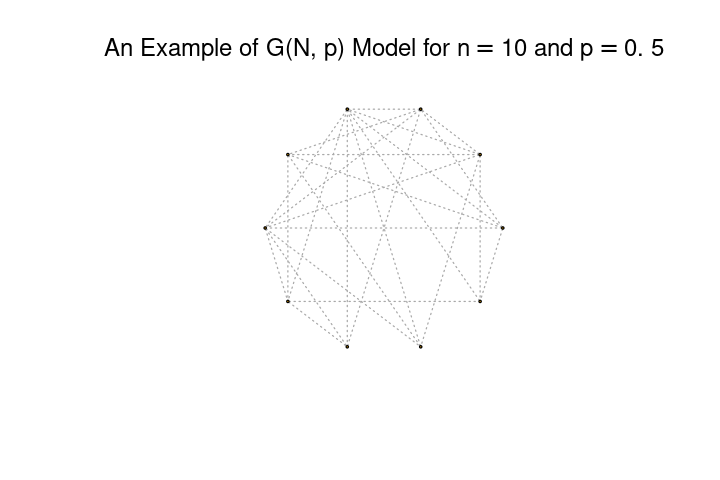

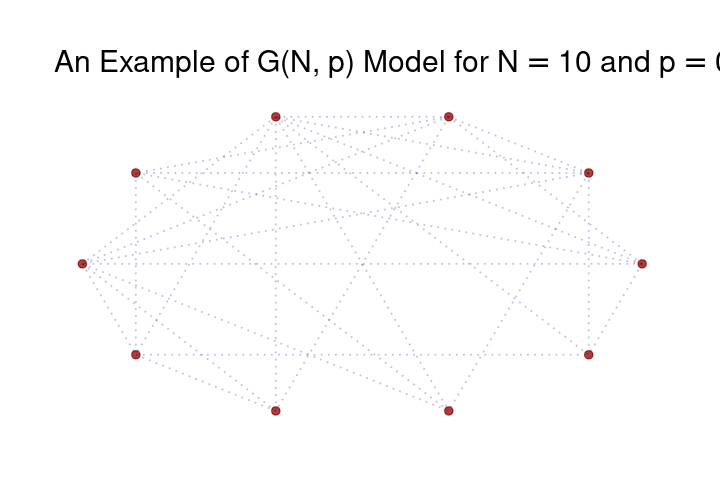

In [3]:
set.seed(42)
# the order of the graph
n <- 10
# the probability that a pair of nodes are adjacent  
p <- 0.5
# creating an example of G(n, p) model
g <- sample_gnp(n, p)

# using igraph to visualize a graph
plot(g, 
     layout = layout_in_circle, 
     vertex.size = 2, 
     vertex.label = NA, 
     edge.lty = 3,
     main = TeX(glue('An Example of $G(N, \\, p)$ Model for $n = $', n, ' and $p = $', p)))

# using ggraph to visualize a graph 
ggraph(g, layout = 'circle') + 
  geom_edge_fan(edge_linetype = 3, color = 'dark blue', alpha = 0.25) + 
  geom_node_point(color = 'dark red', size = 2, alpha = 0.75) + 
  labs(title = TeX(glue('An Example of $G(N, \\, p)$ Model for $N = $', n, ' and $p = $', p))) +
  theme_graph(base_family = 'Helvetica')

## $G(N, \, L)$ Model

[1] 22.5

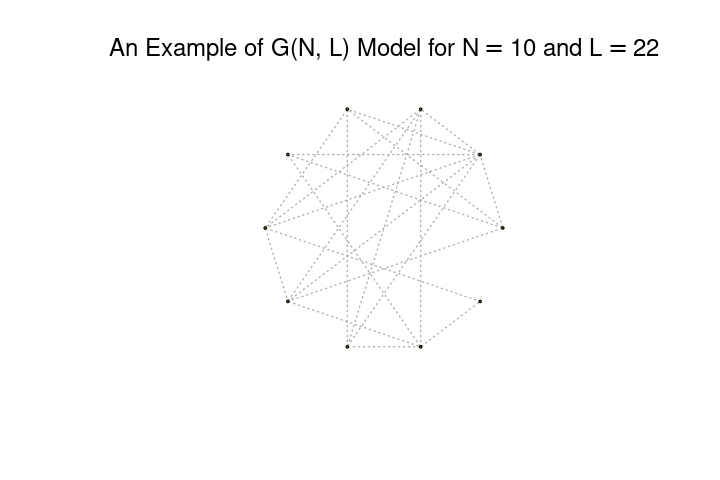

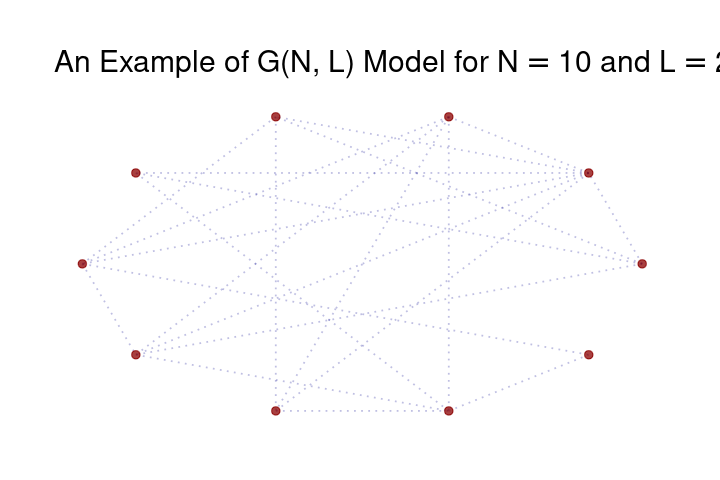

In [4]:
set.seed(42)
# the order of the graph
n <- 10
# the probability that a pair of nodes are adjacent 
p <- 0.5
# the size of the graph
m <- 22
# equation 3.0 on p. 75
choose(n, 2) * p
# creating an example of G(n, l) model
g <- sample_gnm(n, m)
# using igraph to visualize g
plot(g, 
     layout = layout_in_circle, 
     vertex.size = 2, 
     vertex.label = NA, 
     edge.lty = 3,
     main = TeX(glue('An Example of $G(N, \\, L)$ Model for $N = $', n, ' and $L = $', m)))
# using ggraph to visualize g
ggraph(g, layout = 'circle') + 
  geom_edge_link(edge_linetype = 3, color = 'dark blue', alpha = 0.25) + 
  geom_node_point(color = 'dark red', size = 2, alpha = 0.75) + 
  labs(title = TeX(glue('An Example of $G(N, \\, L)$ Model for $N = $', n, ' and $L = $', m))) +
  theme_graph(base_family = 'Helvetica')

Note that $\binom{n}{2} \cdot p = \binom{10}{2} \cdot 0.5 = 45 \cdot 0.5 \approx 22$.  

# 3.4 Degree Distribution

## 3.4.1 Binomial Distribution

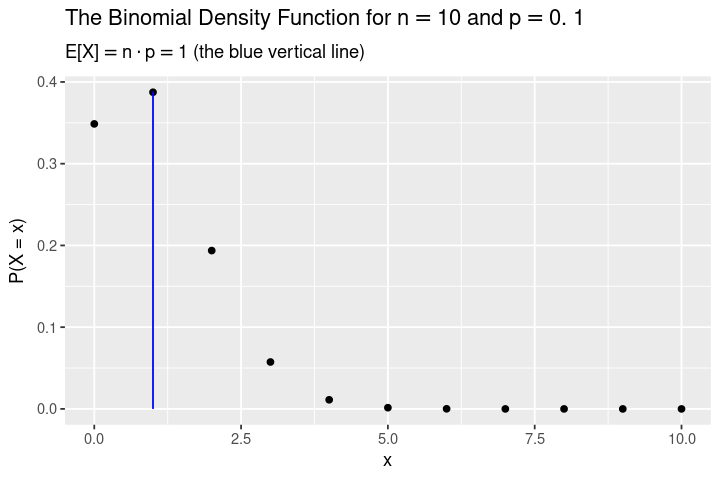

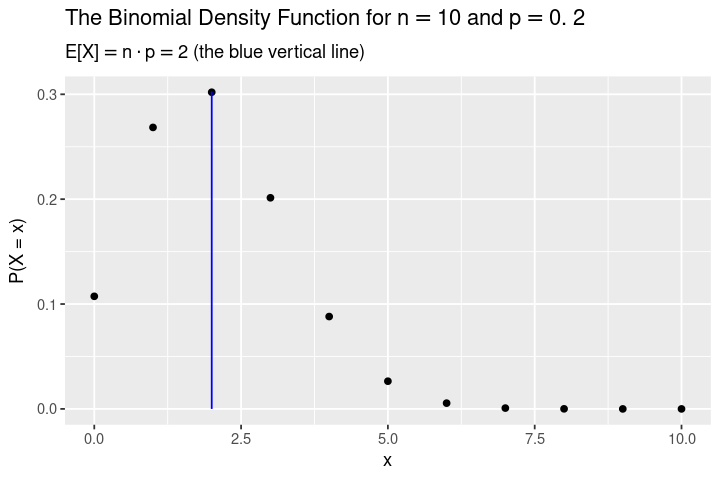

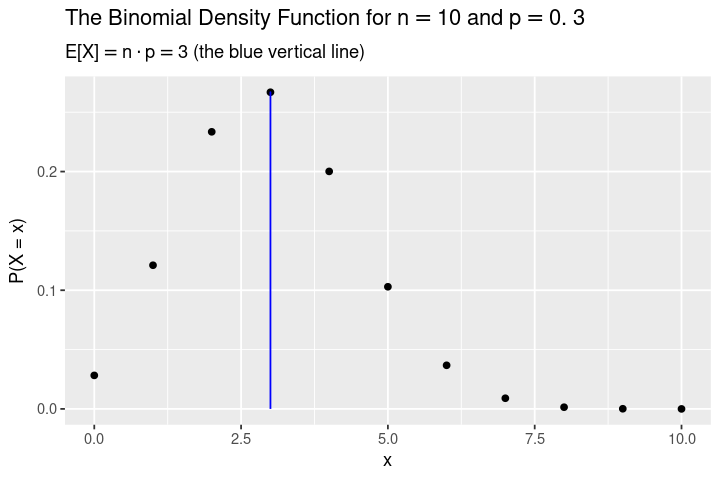

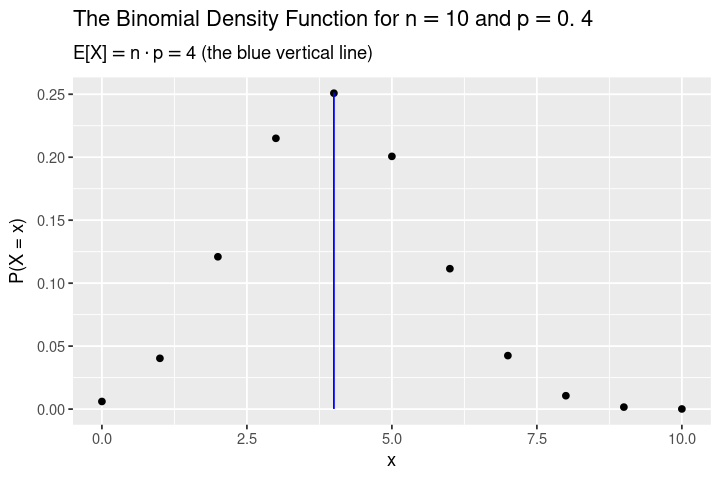

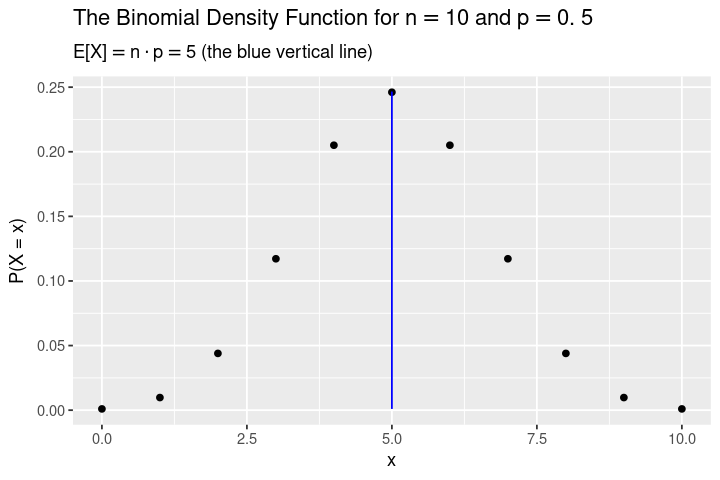

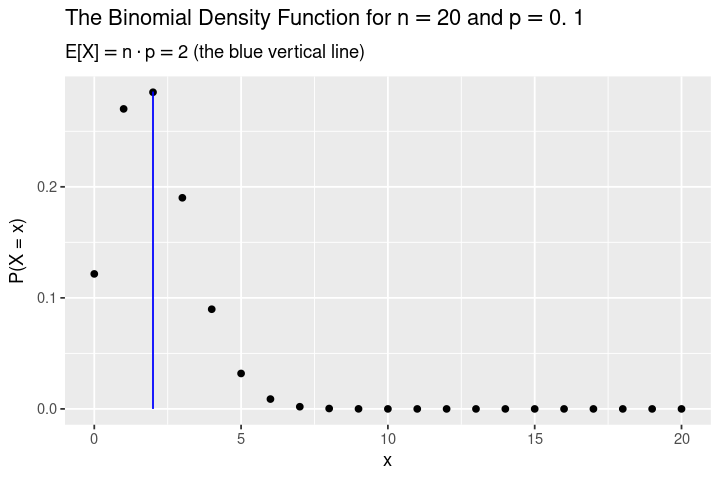

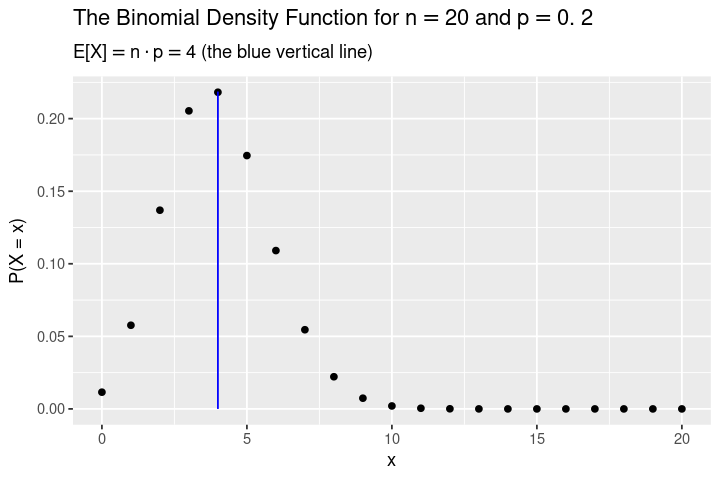

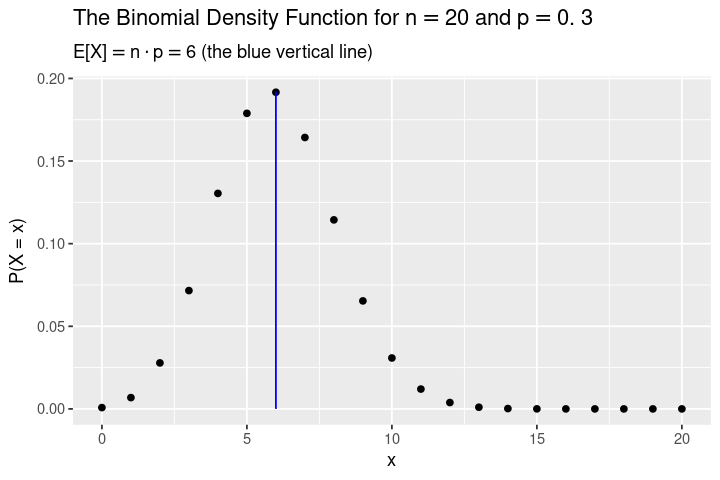

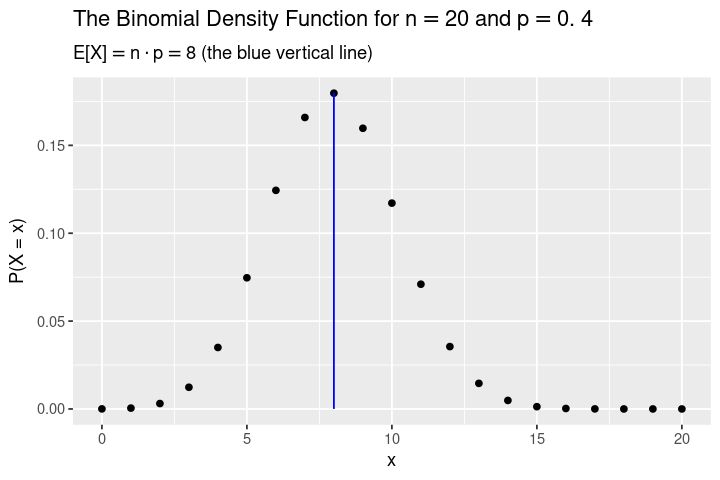

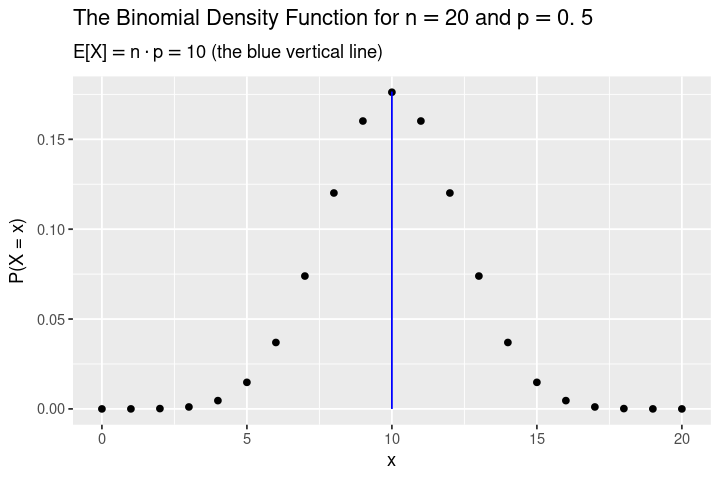

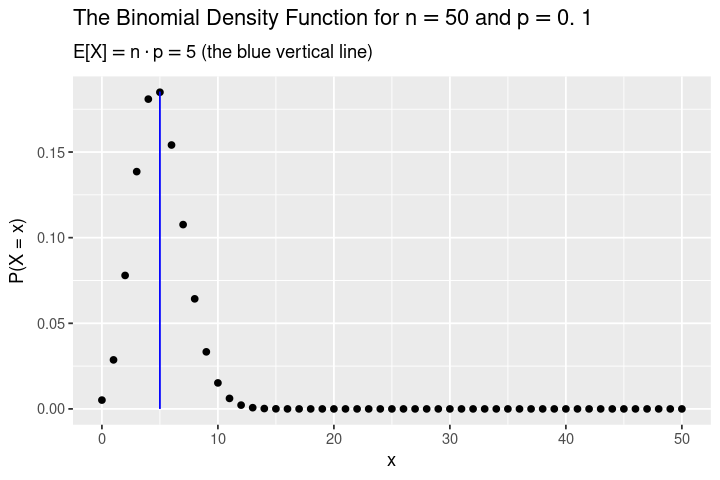

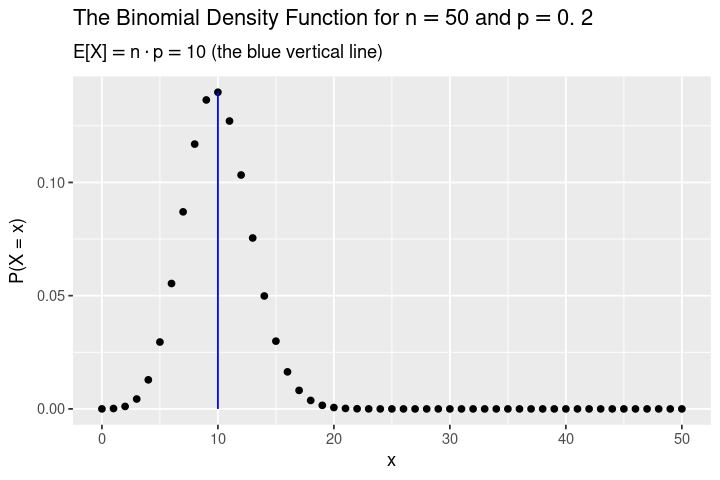

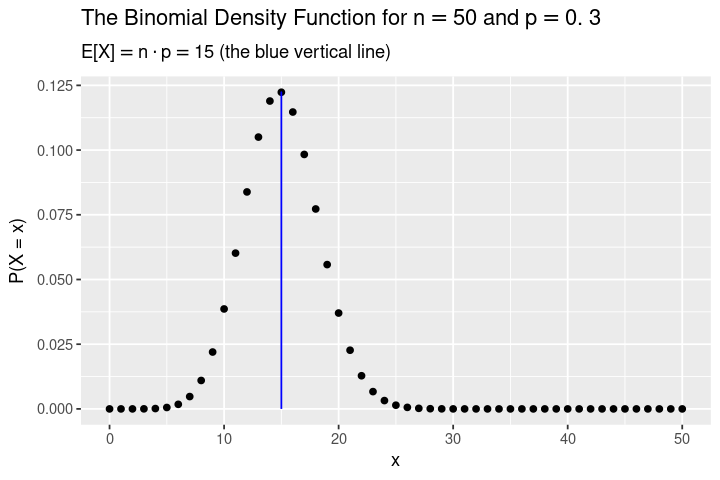

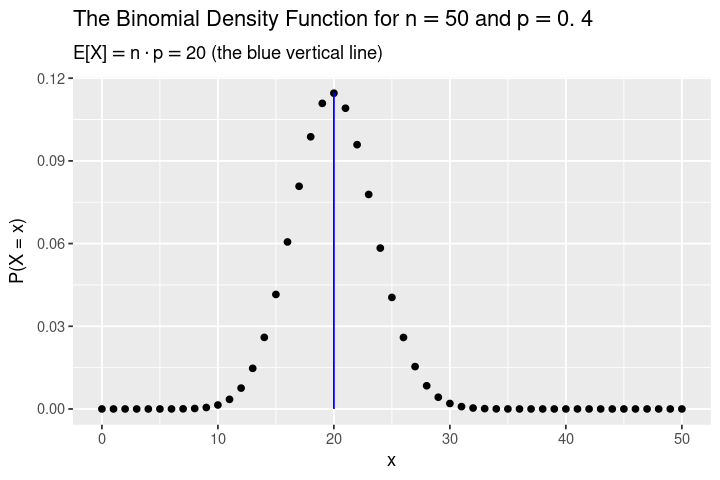

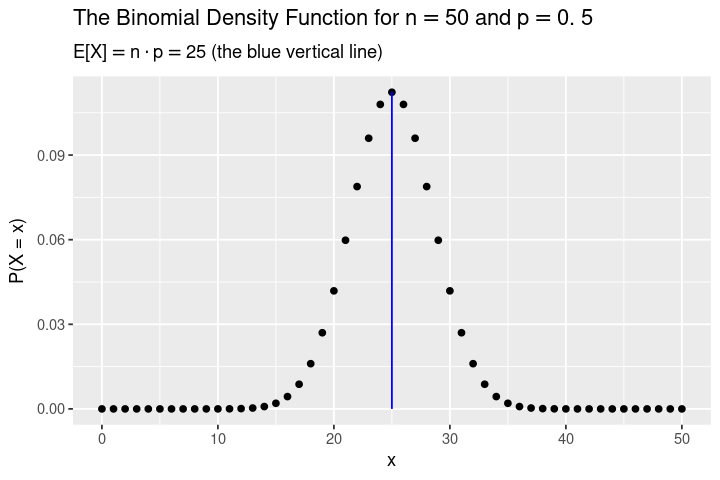

In [5]:
for (n in c(10, 20, 50)) {
  
  for (p in c(0.1, 0.2, 0.3, 0.4, 0.5)) {
    # possible values for X when X ~ Binom(n, p)
    x <- c(0:n)
    # P(X = x) when X ~ Binom(n, p)
    y <- dbinom(x, n, p)
    
    df <- data.frame(x, y)
    
    names(df) <- c('x', 'y')
    
    print(df %>% 
            ggplot(aes(x = x, y = y)) + 
            geom_point() + 
            geom_line(aes(x = n * p), color = 'blue') +
            labs(title = TeX(glue('The Binomial Density Function for $n = $', n, ' and $p = $', p)),
                 subtitle = TeX(glue('$E\\[X\\] = n \\cdot p = $', n * p, ' (the blue vertical line)')),
                 y = TeX('P(X = x)')))
    
  }
  
}

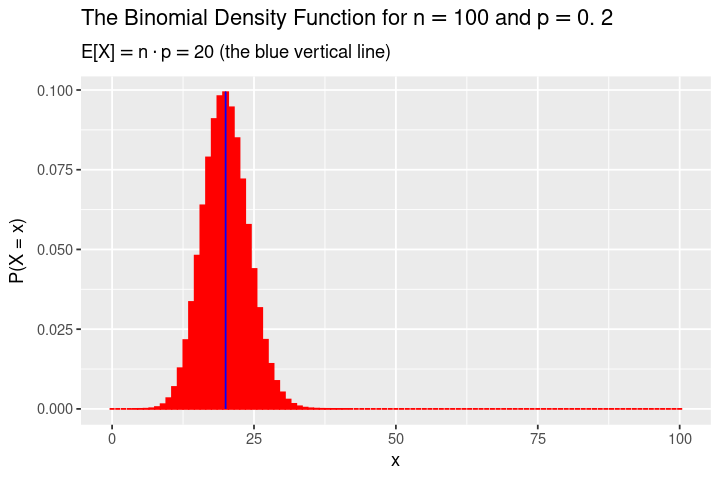

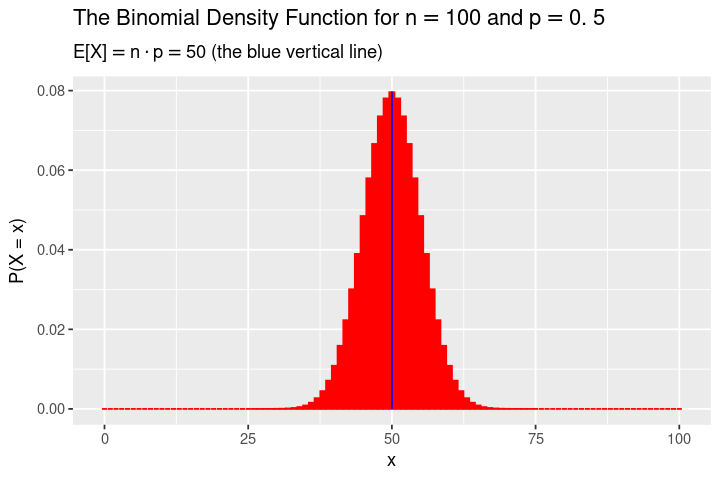

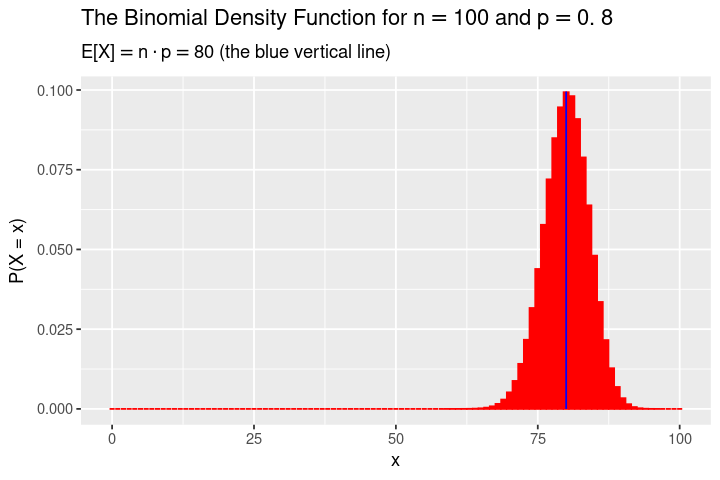

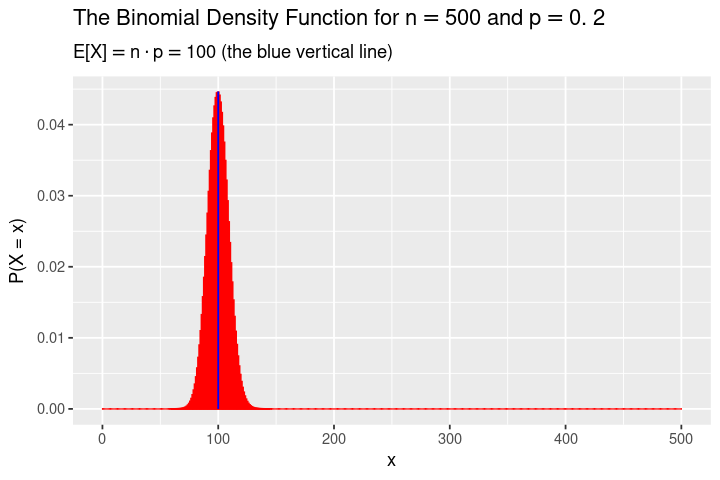

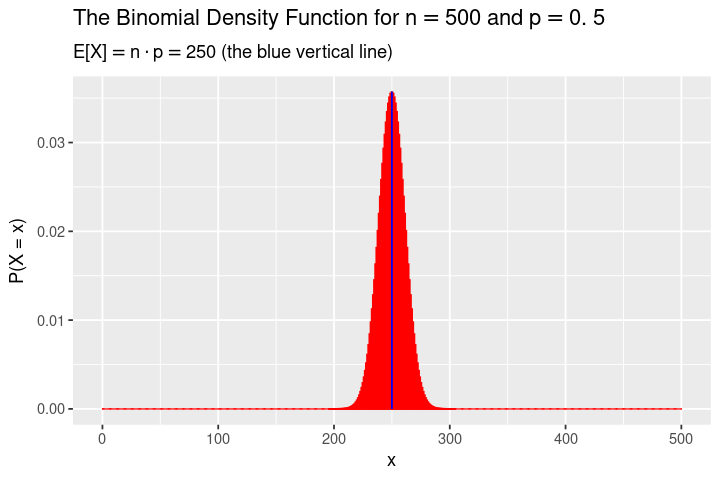

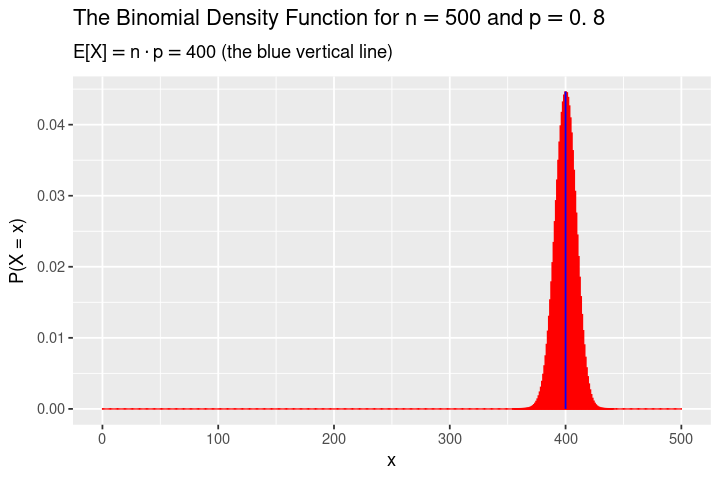

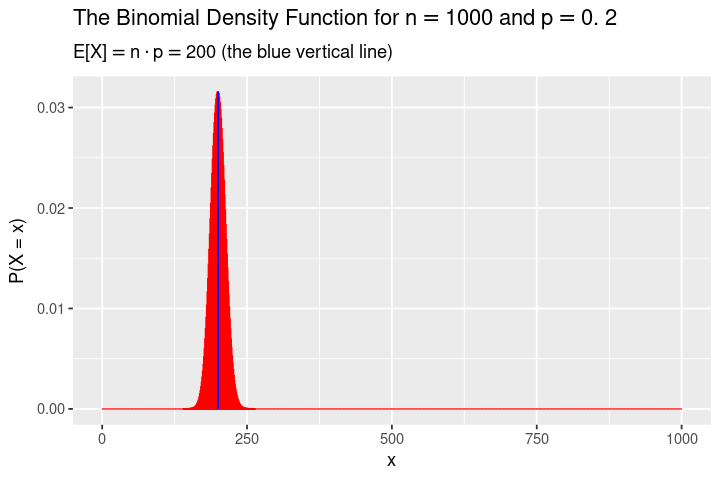

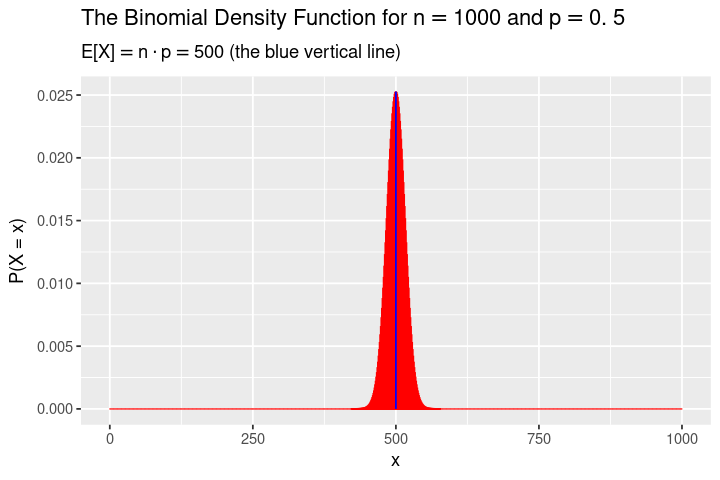

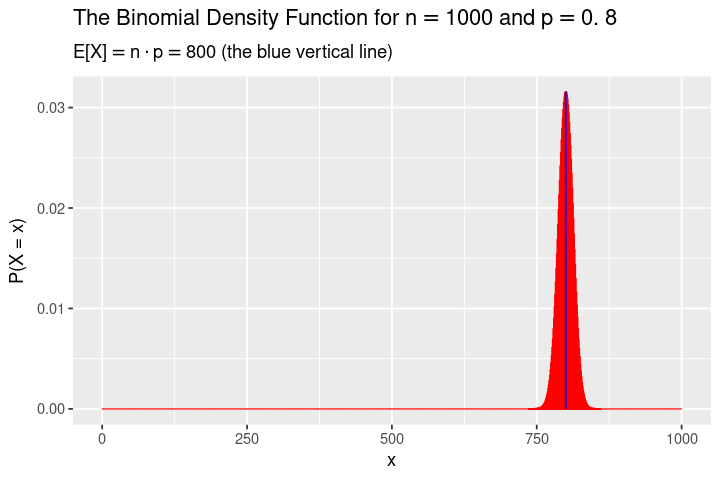

In [6]:
for (n in c(100, 500, 1000)) {
  
  for (p in c(0.2, 0.5, 0.8)) {
  
      x <- c(0:n)
    
      y <- dbinom(x, n, p)
    
      df <- data.frame(x, y)
    
      names(df) <- c('x', 'y')
    
      print(df %>% 
              ggplot(aes(x = x, y = y)) + 
              geom_bar(stat = 'identity', col = 'red', fill = 'red') + 
              geom_line(aes(x = n * p), color = 'blue') + 
              labs(title = TeX(glue('The Binomial Density Function for $n = $', n, ' and $p = $', p)),
                 subtitle = TeX(glue('$E\\[X\\] = n \\cdot p =$', n * p, ' (the blue vertical line)')),
                 y = TeX('P(X = x)')))
      
  }
  
}

## 3.4.2 Poisson Distribution

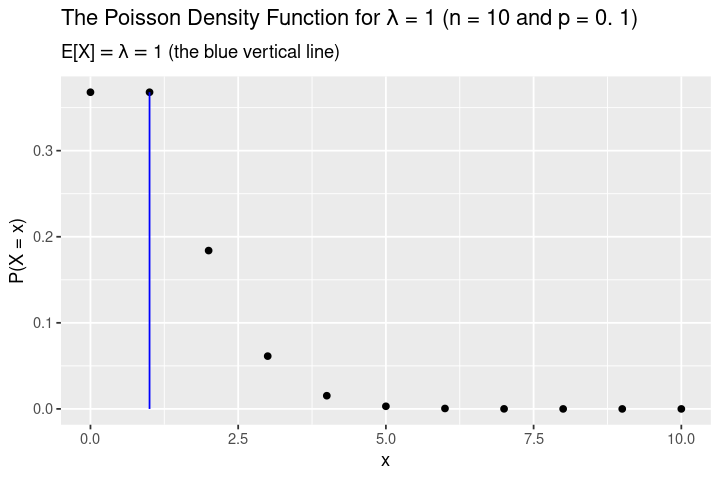

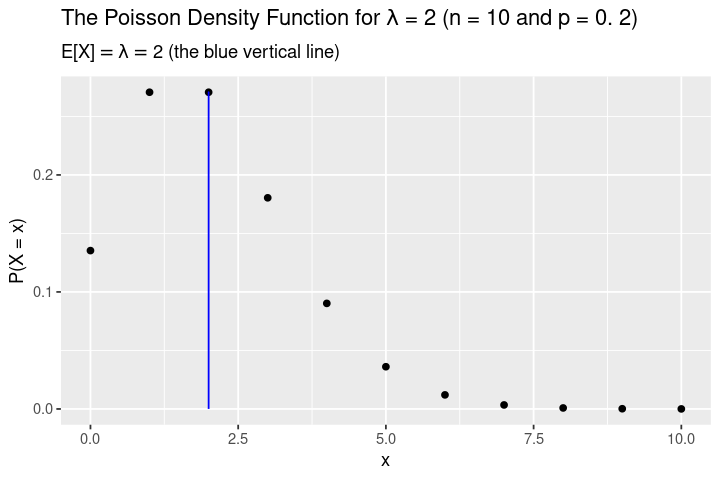

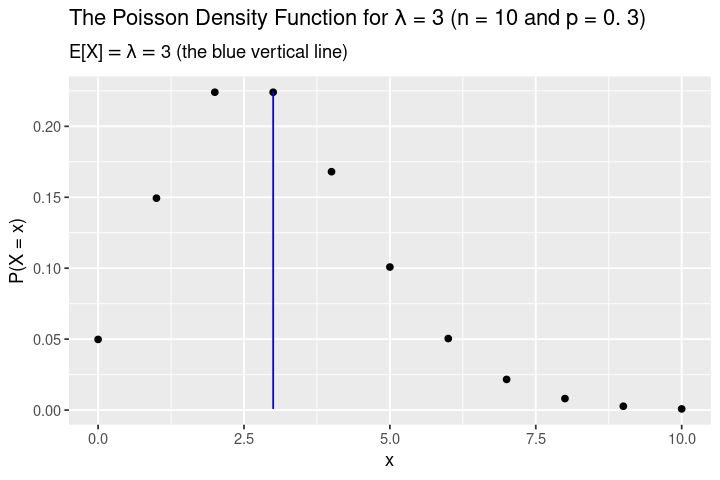

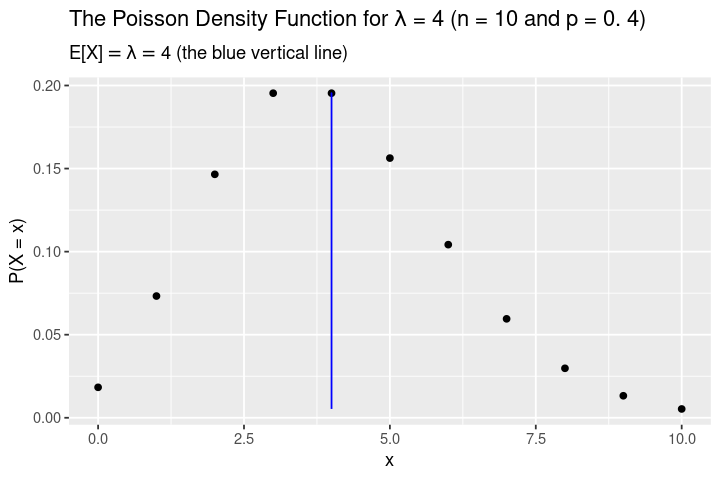

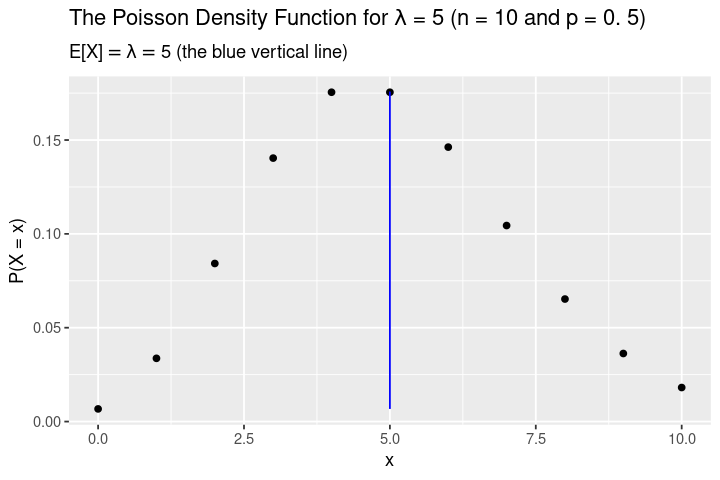

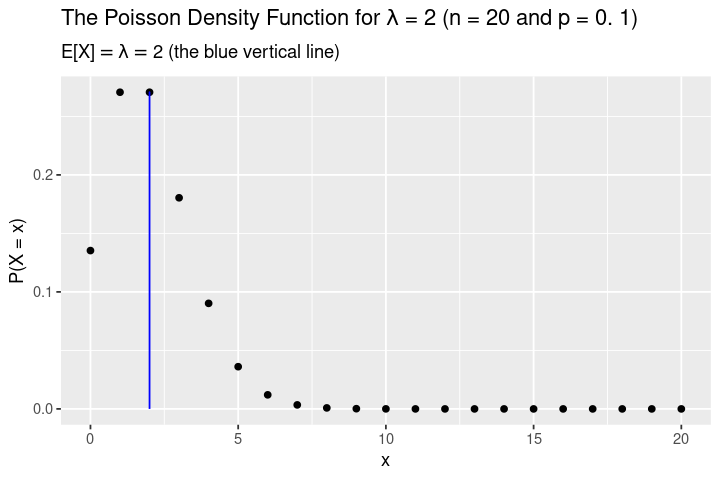

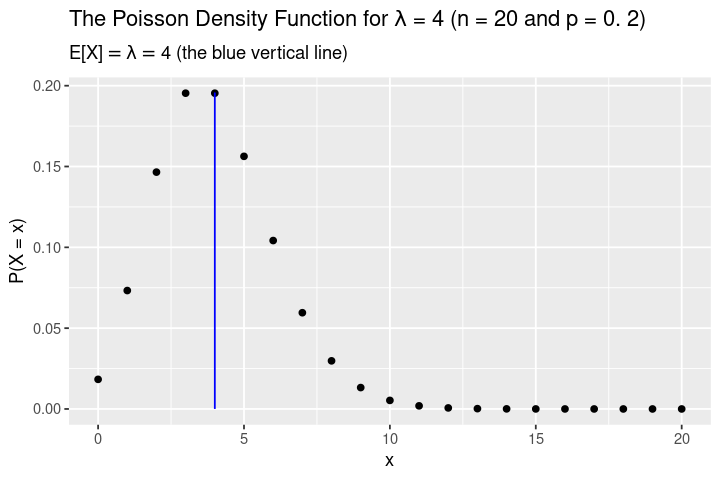

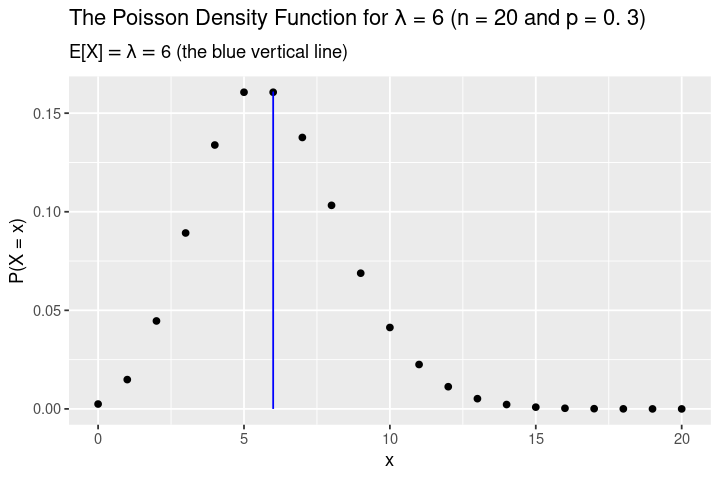

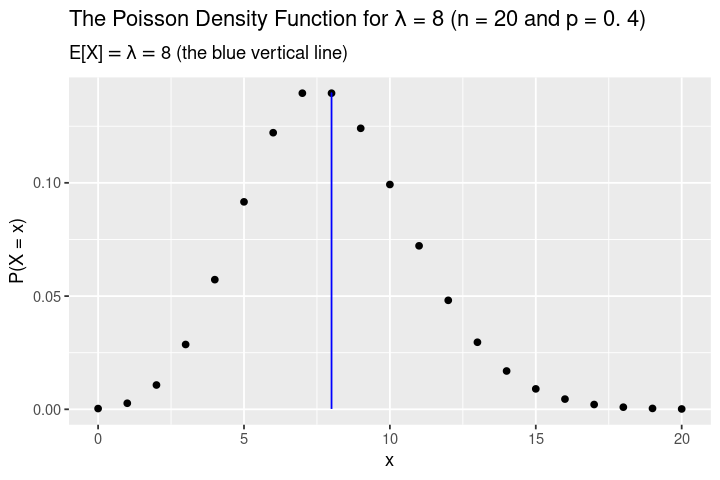

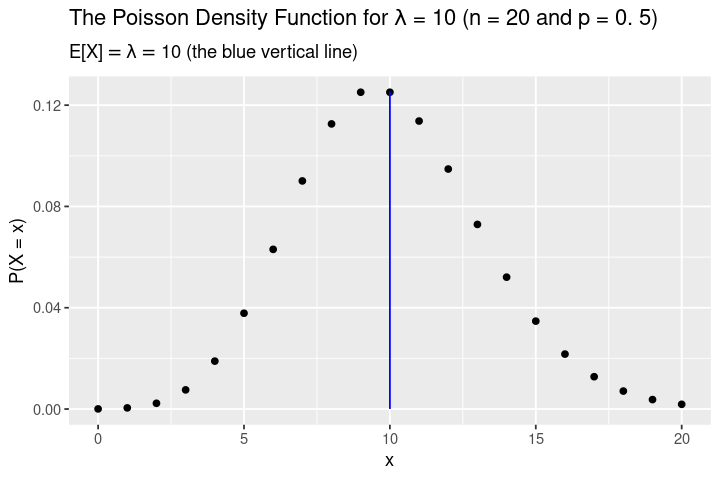

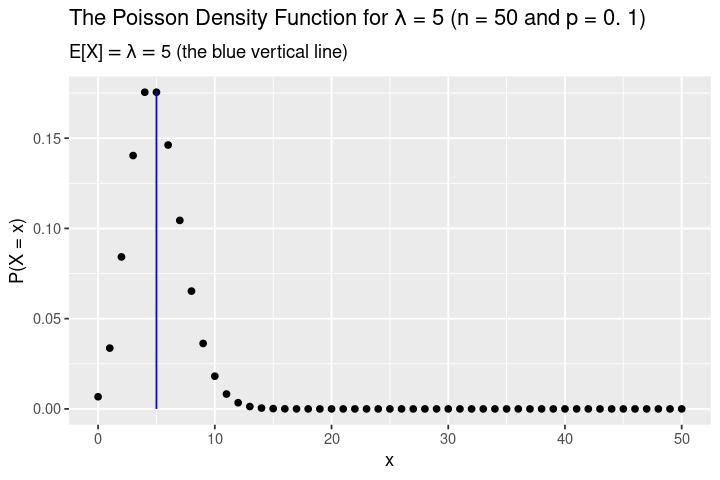

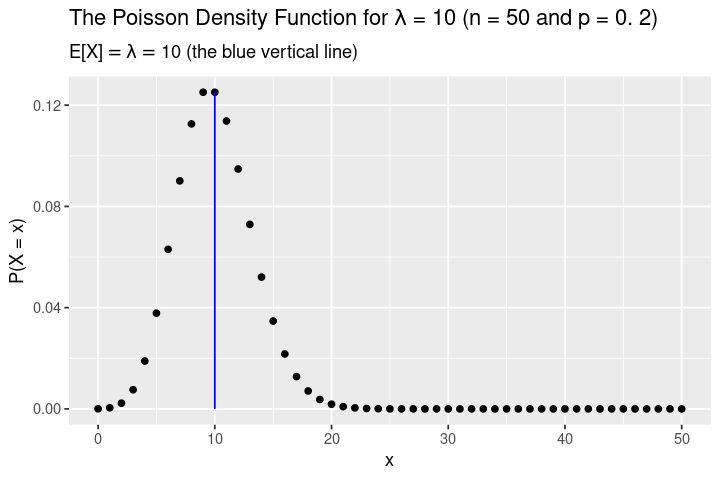

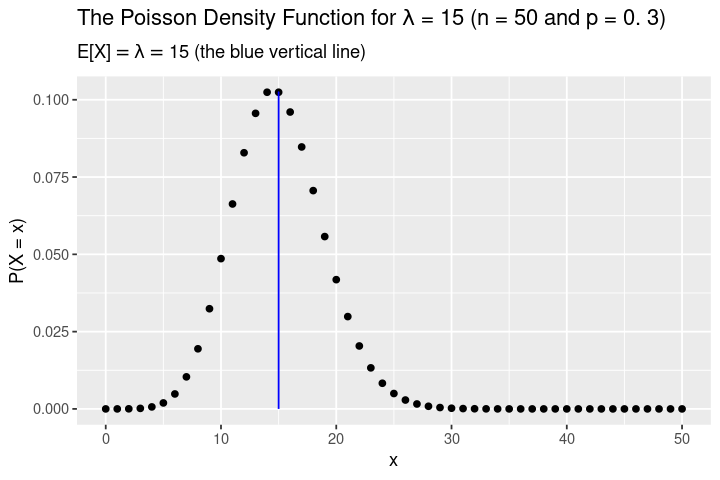

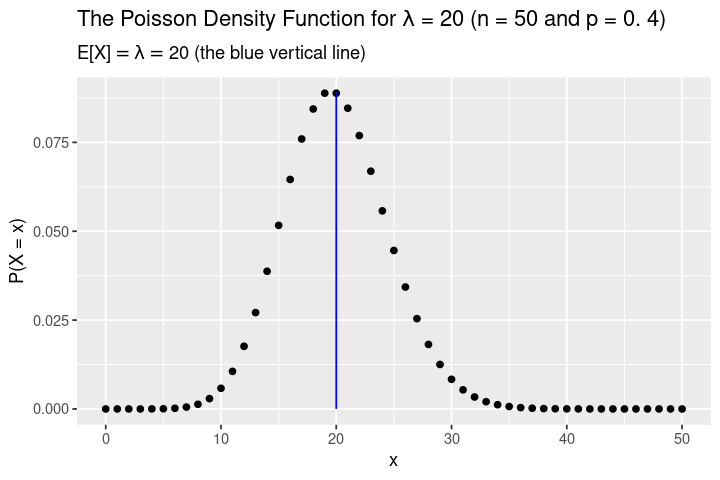

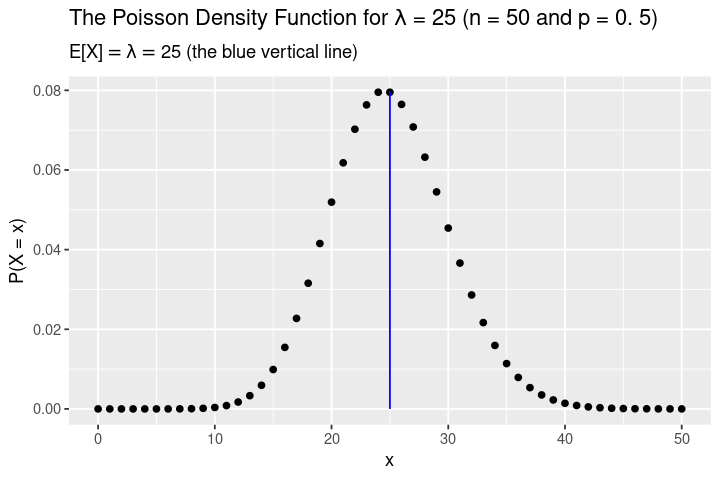

In [7]:
for (n in c(10, 20, 50)) {
  
  for (p in c(0.1, 0.2, 0.3, 0.4, 0.5)) {
    
    x <- c(0:n)
    # P(X = x) when X ~ Pois(n, p) and X <= n; lambda = n * p
    y <- dpois(x, n * p)
    
    df <- data.frame(x, y)
    
    names(df) <- c('x', 'y')
    
    print(df %>% 
            ggplot(aes(x = x, y = y)) + 
            geom_point() + 
            geom_line(aes(x = n * p), color = 'blue') + 
            labs(title = TeX(glue('The Poisson Density Function for $\\lambda$ = ', n * p, 
                                  ' (n = ', n, ' and p = ', p, ')')),
                 subtitle = TeX(glue('$E\\[X\\] = \\lambda = $', n * p, ' (the blue vertical line)')),
                 y = 'P(X = x)'))
    
  }
  
}

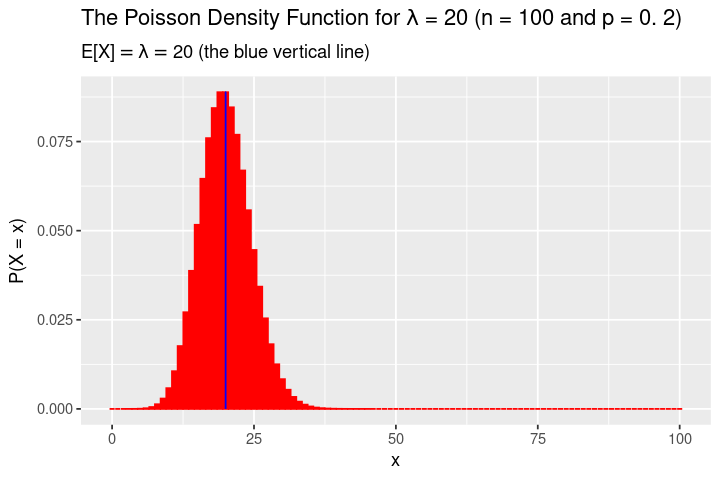

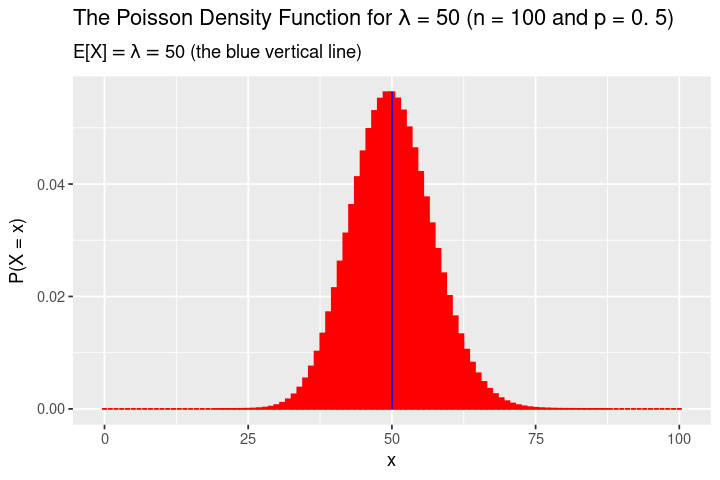

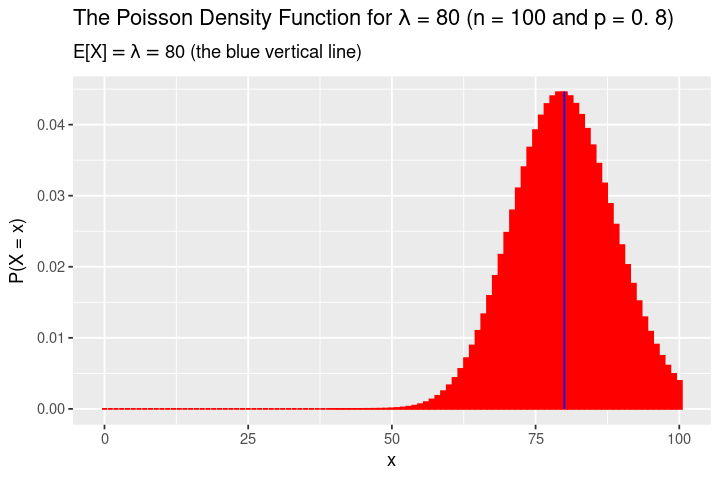

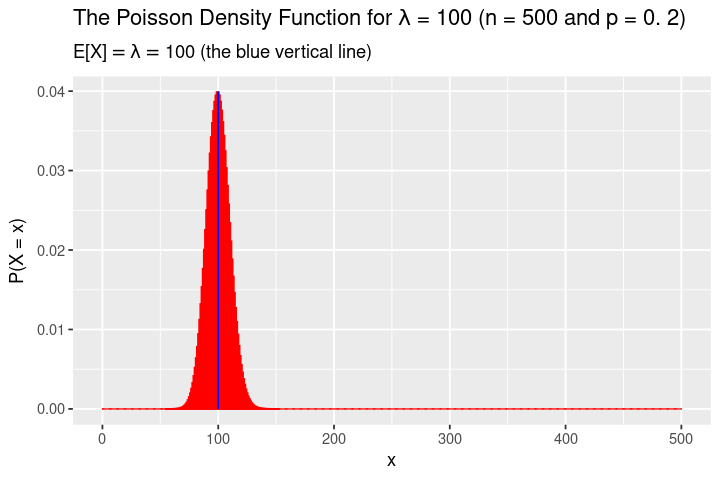

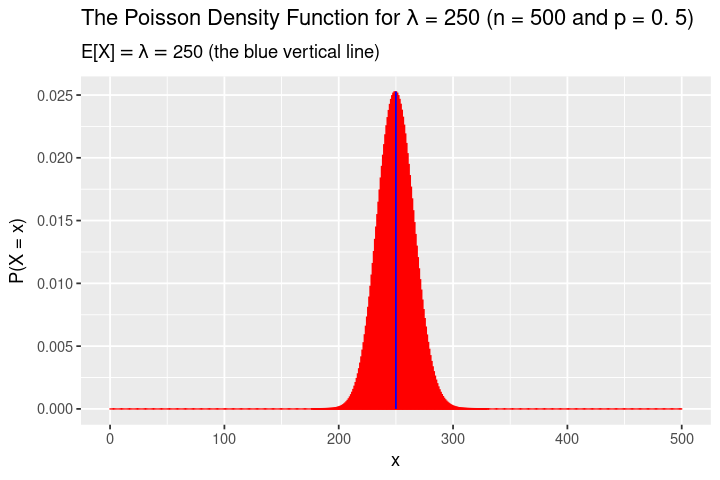

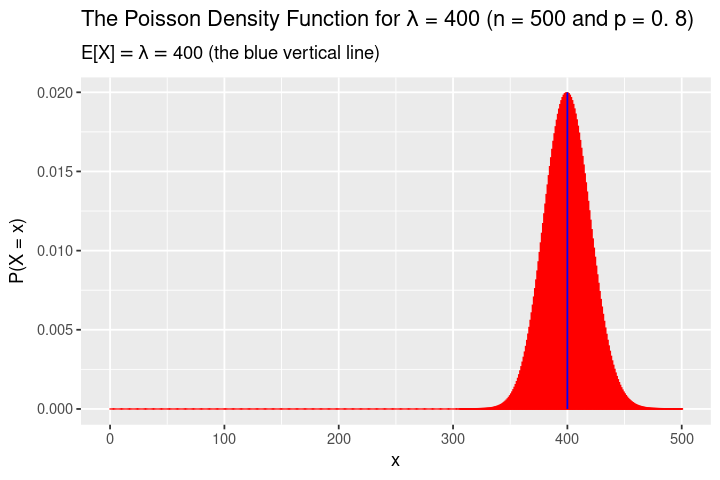

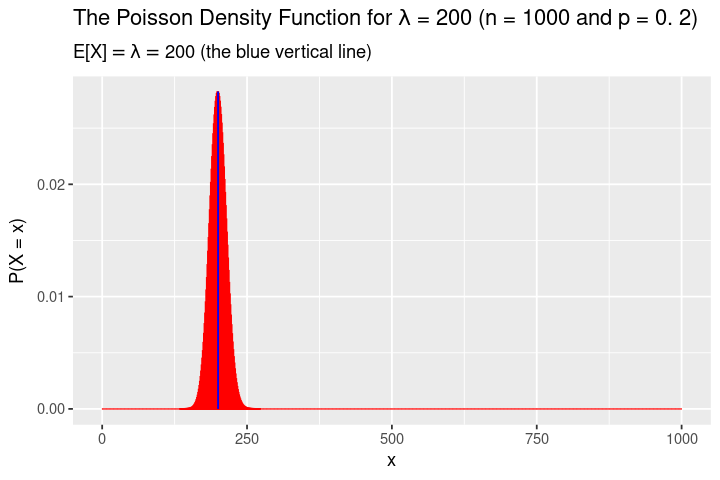

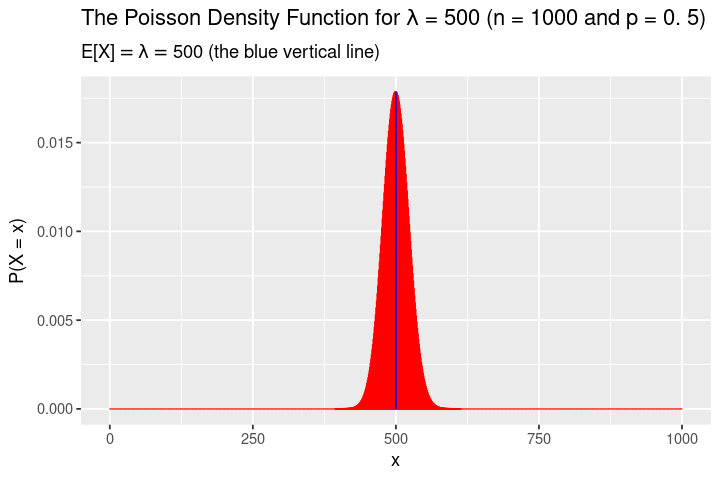

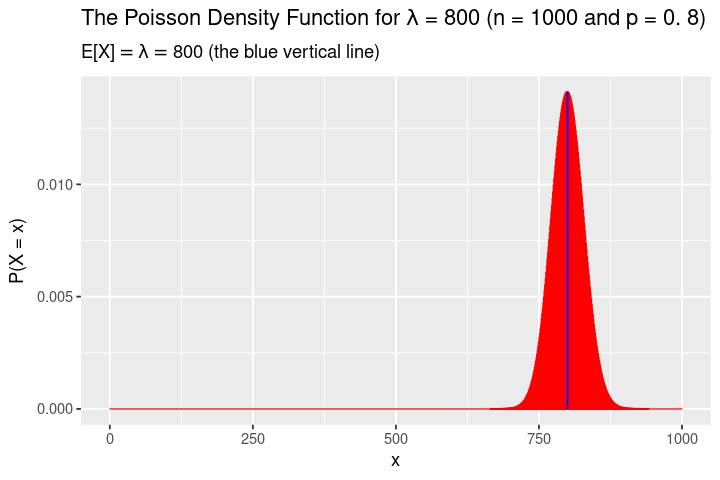

In [8]:
for (n in c(100, 500, 1000)) {
  
  for (p in c(0.2, 0.5, 0.8)) {
    
    x <- c(0:n)
    # P(X = x) when X ~ Pois(n, p) and X <= n; lambda = n * p
    y <- dpois(x, n * p)
    
    df <- data.frame(x, y)
    
    names(df) <- c('x', 'y')
    
    print(df %>% 
            ggplot(aes(x = x, y = y)) + 
            geom_bar(stat = 'identity', col = 'red', fill = 'red') + 
            geom_line(aes(x = n * p), color = 'blue') + 
            labs(title = TeX(glue('The Poisson Density Function for $\\lambda$ = ', n * p, 
                                  ' (n = ', n, ' and p = ', p, ')')),
                 subtitle = TeX(glue('$E\\[X\\] = \\lambda = $', n * p, ' (the blue vertical line)')),
                 y = TeX('P(X = x)')))
    
  }
  
}

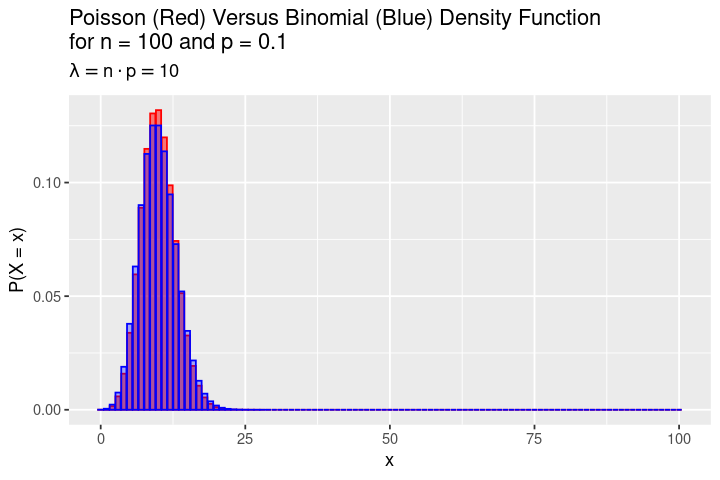

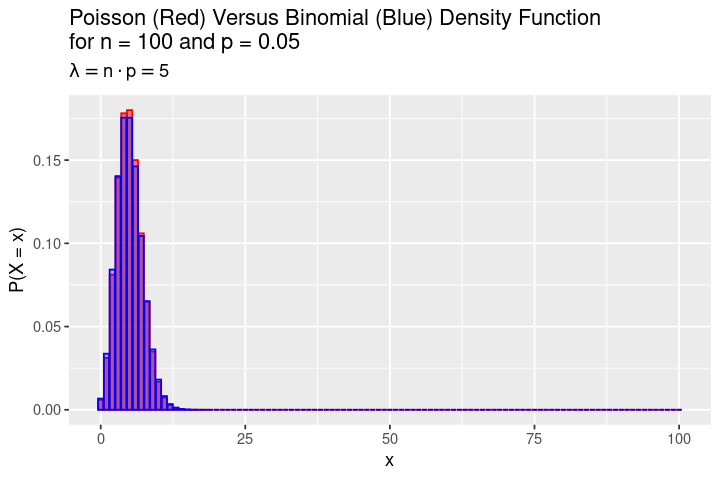

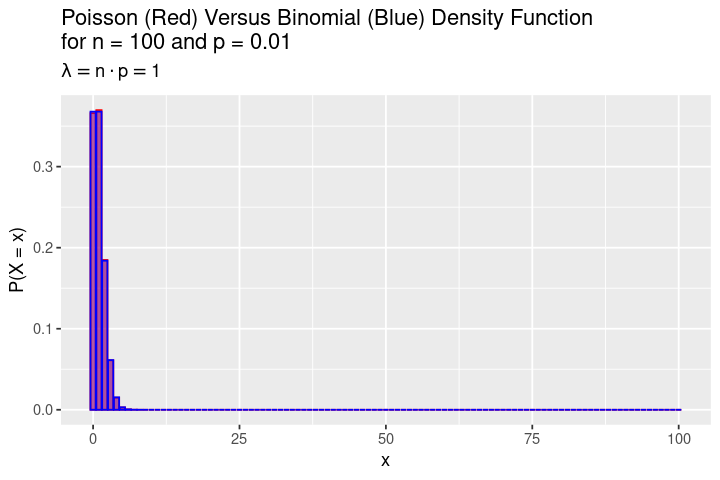

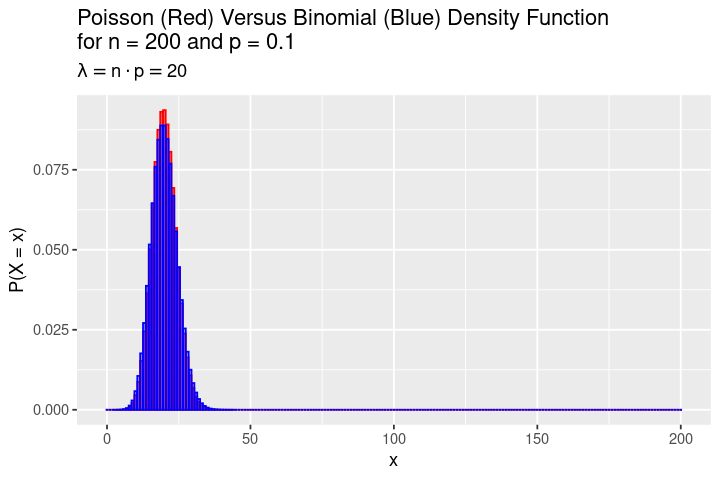

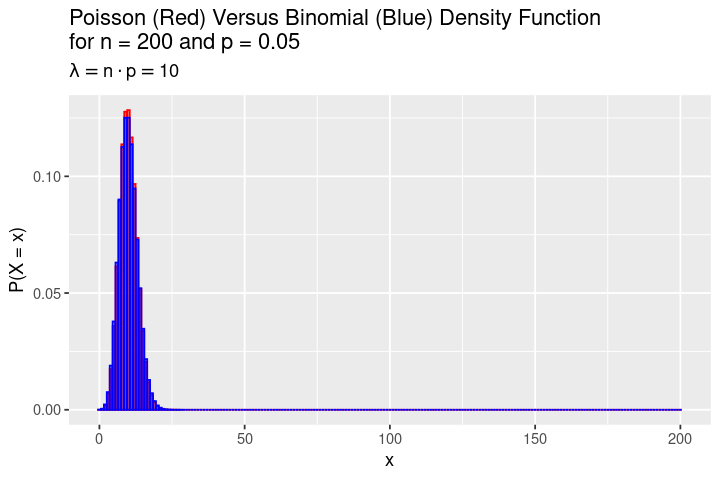

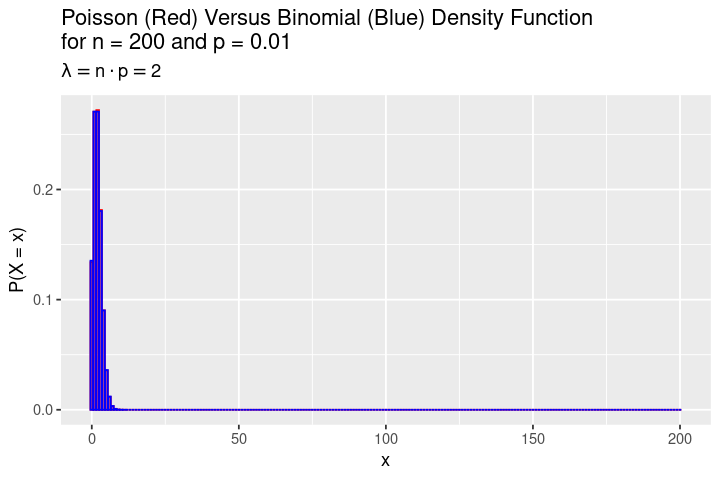

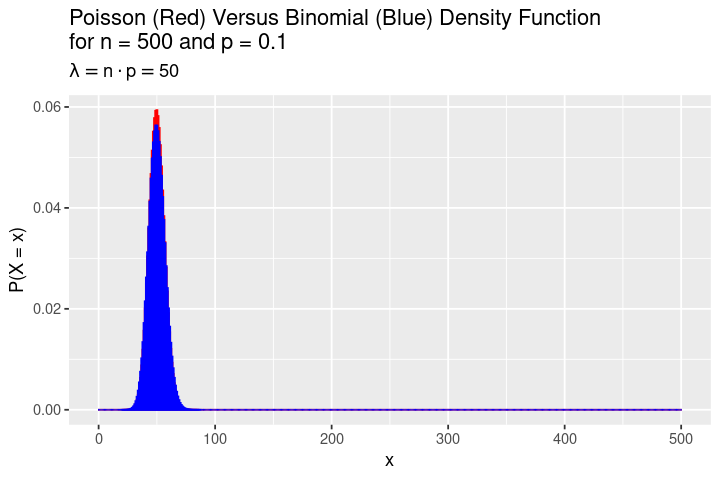

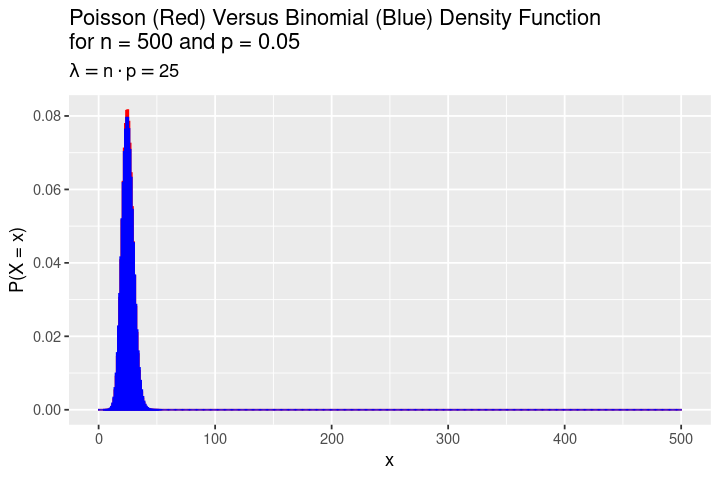

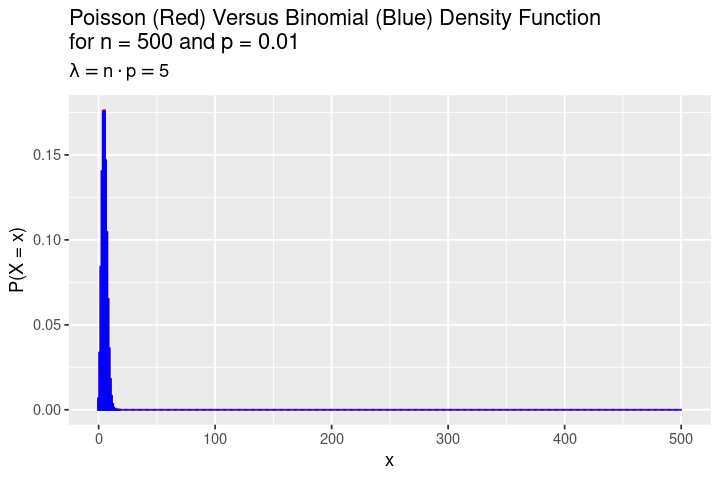

In [9]:
for (n in c(100, 200, 500)) {
  
  for (p in c(0.1, 0.05, 0.01)) {
    
    x <- c(0:n)
    
    y <- dbinom(x, n, p)
    
    z <- dpois(x, n * p)
    
    df <- data.frame(x, y, z)
    
    names(df) <- c('x', 'y', 'z')
    
    print(df %>% 
            ggplot(aes(x = x)) + 
            geom_bar(aes(y = y), stat = 'identity', col = 'red', fill = 'red', alpha = 0.5) + 
            geom_bar(aes(y = z), stat = 'identity', col = 'blue', fill = 'blue', alpha = 0.3) +
            labs(title = glue('Poisson (Red) Versus Binomial (Blue) Density Function \n for n = ', n, 
                              ' and p = ', p),
                 subtitle = TeX(glue('$\\lambda = n \\cdot p = $', n * p)),
                 y = 'P(X = x)'))
    
  }
  
}

# 3.3 Number of Links

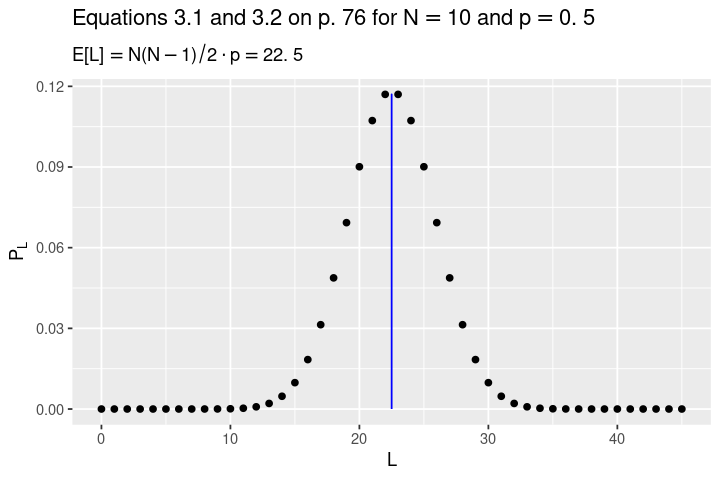

In [10]:
# exploring equations 3.1 and 3.2 on p. 76
n <- 10

M <- choose(n, 2)

p <- 0.5

x <- c(0:M)

y <- dbinom(x, M, p)

df <- data.frame(x,y)

names(df) <- c('x', 'y')

df %>% 
  ggplot(aes(x = x, y = y)) + 
  geom_point() + 
  geom_line(aes(x = M * p), color = 'blue') + 
  labs(title = TeX(glue('Equations $3.1$ and $3.2$ on p. 76 for $N = $', n, ' and $p = $', p)),
       subtitle = TeX(glue('$E\\[ L \\] = N (N - 1) / 2 \\cdot p = $', n * (n - 1) * p / 2)),
       x = TeX('$L$'),
       y = TeX('$P_L$'))

# 3.4 The Degree Distribution

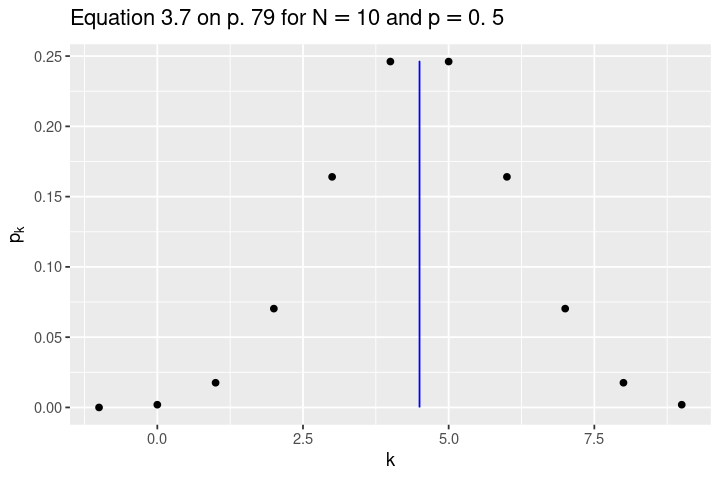

In [11]:
# exploring equation 3.7 on p. 79
n <- 10

p <- 0.5

x <- c(0:n-1)

y <- dbinom(x, n - 1, p)

df <- data.frame(x,y)

names(df) <- c('x', 'y')

df %>% 
  ggplot(aes(x = x, y = y)) + 
  geom_point() + 
  geom_line(aes(x = (n-1) * p), color = 'blue') +
  labs(title = TeX(glue('Equation $3.7$ on p. 79 for $N = $', n, ' and $p = $', p)),
       x = TeX('$k$'),
       y = TeX('$p_k$'))

# 3.6 The Evolution of a Random Network

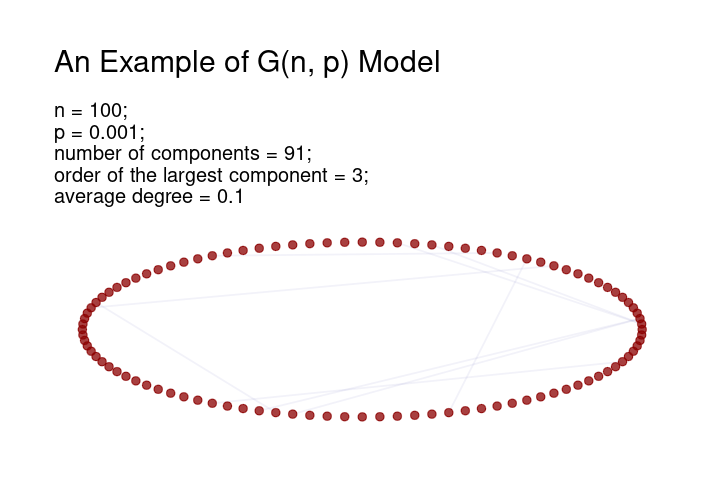

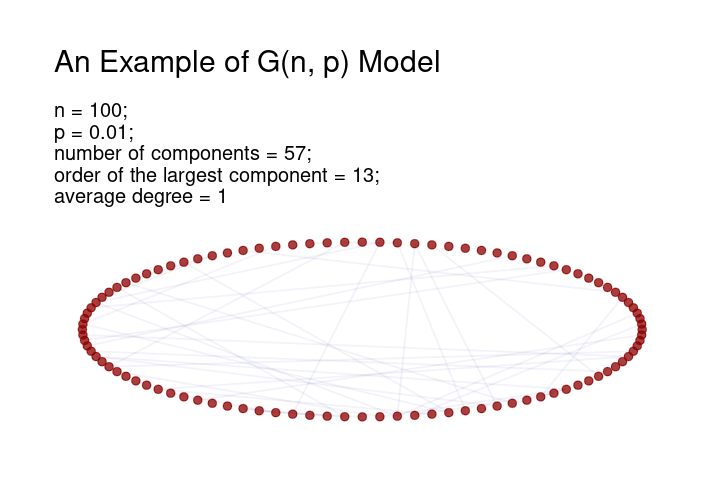

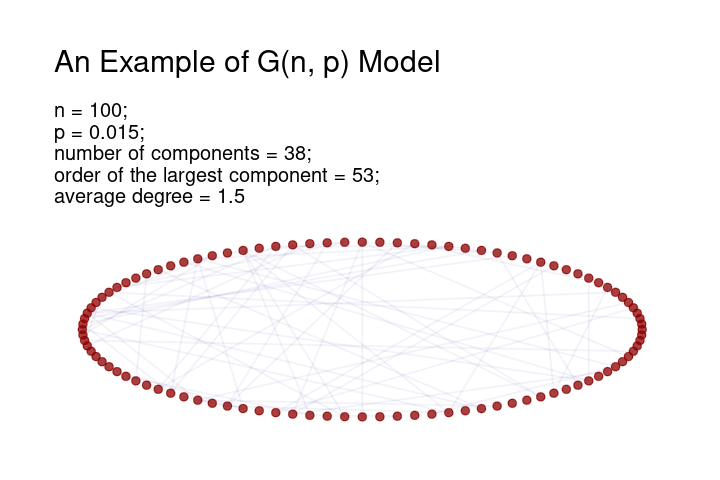

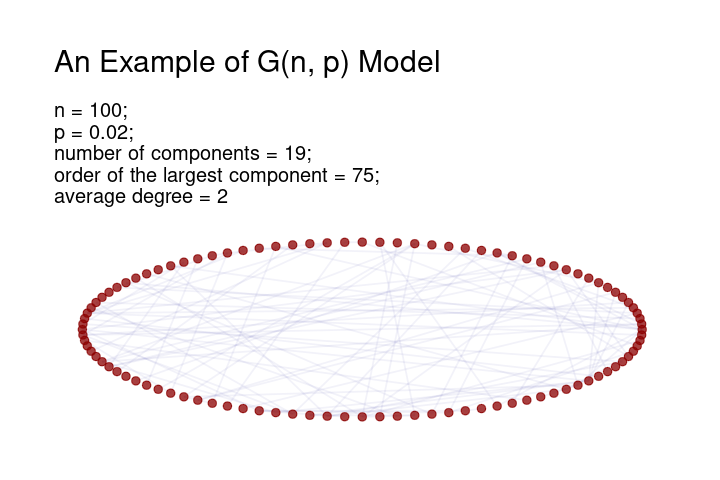

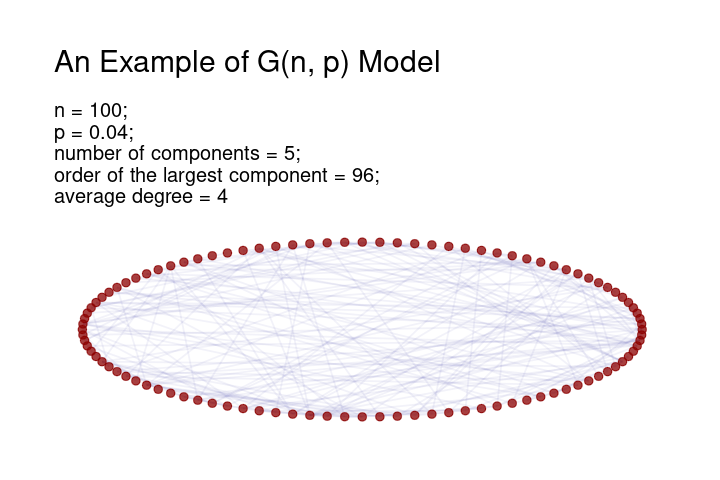

[1] 0.0460517

[1] 4.60517

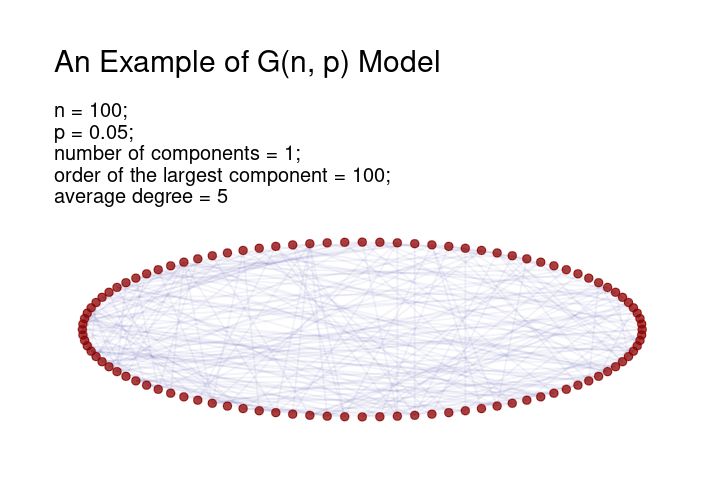

In [12]:
set.seed(42)

n <- 100

for (p in c(0.001, 0.01, 0.015, 0.02, 0.04, 0.05)) {
  
  g <- sample_gnp(n, p)
  
  print(ggraph(g, layout = 'circle') + 
          geom_edge_fan(color = 'dark blue', alpha = 0.05) + 
          geom_node_point(color = 'dark red', size = 2, alpha = 0.75) + 
          theme_graph(base_family = 'Helvetica') +
          labs(title = TeX('An Example of $G(n, \\, p)$ Model'),
               subtitle = glue(' n = ', n,
                               ';\np = ', p, 
                               ';\nnumber of components = ', components(g)$no, 
                               ';\norder of the largest component = ', max(components(g)$csize),
                               ';\naverage degree = ', n * p)))
  
  writeLines('\n')
  
}

log(n) / n

log(n)

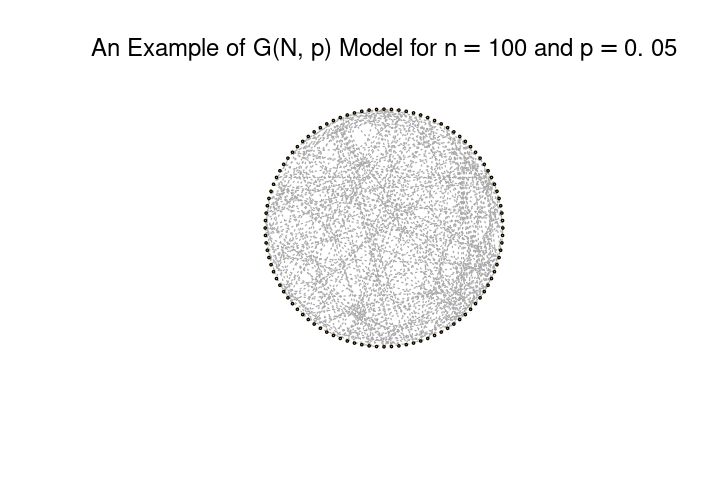

$membership
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$csize
[1] 100

$no
[1] 1

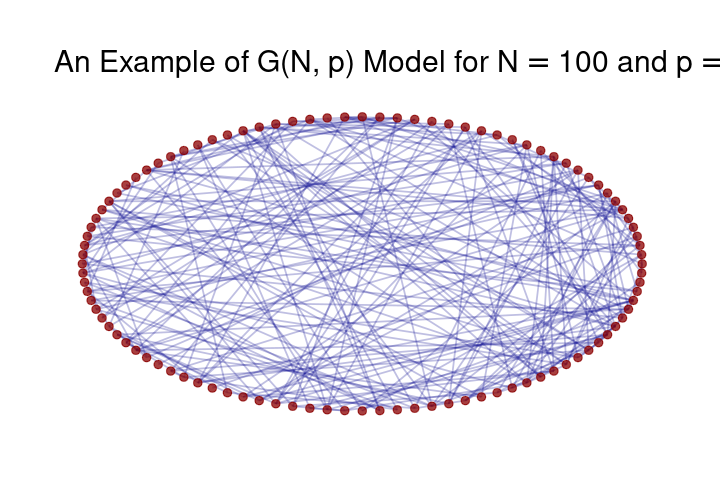

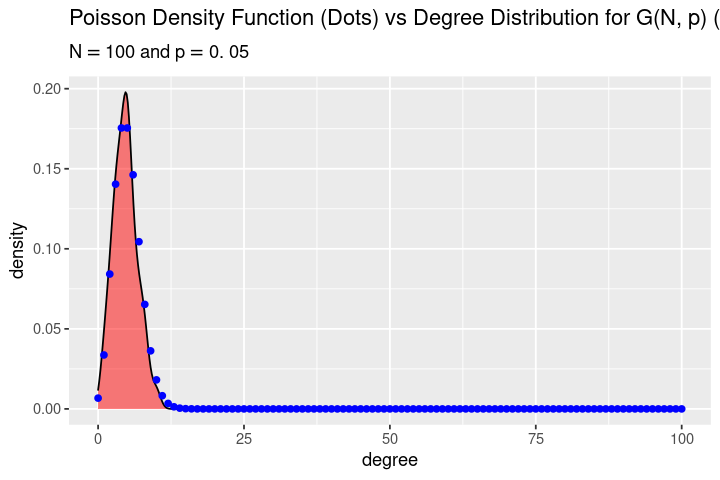

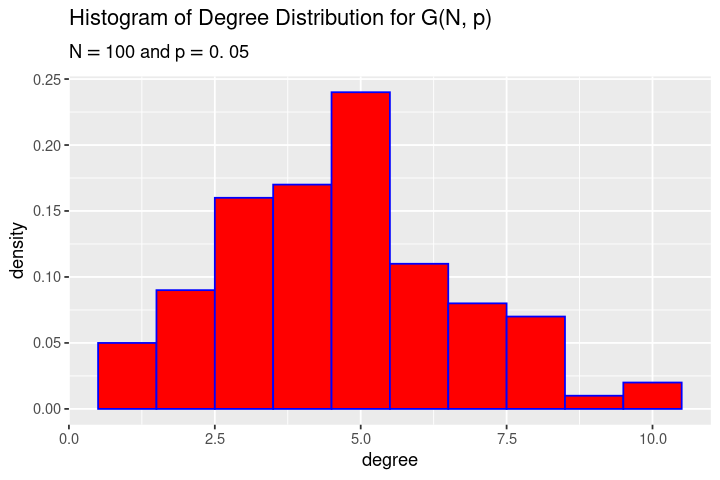

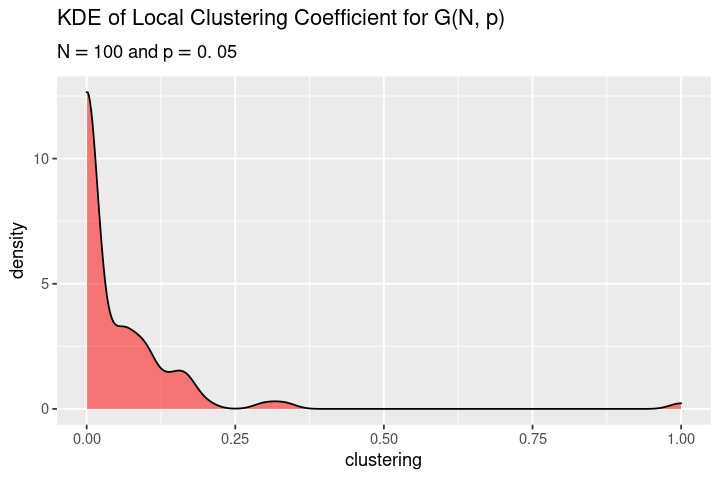

In [13]:
set.seed(42)

n <- 100

p <- 0.05

g <- sample_gnp(n, p)

plot(g, 
     layout = layout_in_circle, 
     vertex.size = 2, 
     vertex.label = NA, 
     edge.lty = 3,
     main = TeX(glue('An Example of $G(N, \\, p)$ Model for $n = $', n, ' and $p = $', p)))

ggraph(g, layout = 'circle') + 
  geom_edge_fan(color = 'dark blue', alpha = 0.25) + 
  geom_node_point(color = 'dark red', size = 2, alpha = 0.75) + 
    theme_graph(base_family = 'Helvetica') +
  labs(title = TeX(glue('An Example of $G(N, \\, p)$ Model for $N = $', n, ' and $p = $', p))) 


components(g)

suppressMessages(df <- bind_cols(enframe(degree(g)), 
                                 enframe(transitivity(g, type = c('local')))))

df <- df %>% select(name...1, value...2, value...4)

names(df) <- c('name', 'degree', 'clustering')

x <- c(0:n)

y <- dpois(x, n * p)

df2 <- data.frame(x, y)

names(df2) <- c('x', 'y')

df %>%
  ggplot(aes(x = degree, y = ..density..)) + 
  geom_density(fill = 'red', alpha = 0.5) + 
  geom_point(data = df2, aes(x = x, y = y), color = 'blue') +
  labs(title = TeX('Poisson Density Function (Dots) vs Degree Distribution for $G(N, \\, p)$ (Curve)'),
       subtitle = TeX(glue('$N = $', n, ' and $p = $', p)))

df %>% 
  ggplot(aes(x = degree, y = ..density..)) +
  geom_histogram(fill = 'red', color = 'blue', binwidth = 1) +
  labs(title = TeX('Histogram of Degree Distribution for $G(N, \\, p)$'),
       subtitle = TeX(glue('$N = $', n, ' and $p = $', p)))

df %>% 
  ggplot(aes(x = clustering, y = ..density..)) + 
  geom_density(fill = 'red', alpha = 0.5, na.rm = TRUE) +
  labs(title = TeX('KDE of Local Clustering Coefficient for $G(N, \\, p)$'),
       subtitle = TeX(glue('$N = $', n, ' and $p = $', p)))